In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

In [2]:
combined = pd.read_csv('data/Dataset.csv')

rows_to_drop = combined.loc[combined['Patient_ID'].apply(lambda x: len(str(x)) == 6)]
df_train = combined.drop(rows_to_drop.index)
df_train.to_csv('data/data_part1.csv', index=False)

rows_to_drop = combined.loc[combined['Patient_ID'].apply(lambda x: len(str(x)) != 6)]
df_test = combined.drop(rows_to_drop.index)
df_test.to_csv('data/data_part2.csv', index=False)


FileNotFoundError: ignored

In [3]:
df_train = pd.read_csv('sample_data/data_part1.csv')
df_test = pd.read_csv('sample_data/data_part2.csv')

In [4]:
df_train.head(15)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072
5,5,5,62.0,100.0,NaN,124.0,85.0,61.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,6,0,17072
6,6,6,61.0,100.0,NaN,101.0,75.0,58.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,7,0,17072
7,7,7,68.0,100.0,35.78,142.0,93.5,78.0,16.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,8,0,17072
8,8,8,71.0,100.0,NaN,121.0,74.0,91.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,9,0,17072
9,9,9,69.0,100.0,NaN,120.0,79.0,98.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,10,0,17072


In [5]:
df_train.columns

Index(['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [6]:
patients = list(df_test['Patient_ID'].unique())
len(patients)

20000

In [7]:
null_values = df_train.isnull().mean()*100
null_values = null_values.sort_values(ascending=False)
null_values

EtCO2               100.000000
TroponinI            99.877881
Bilirubin_direct     99.850420
Fibrinogen           99.236917
Bilirubin_total      98.773372
Alkalinephos         98.540650
AST                  98.504205
Lactate              96.565112
PTT                  95.152459
SaO2                 95.044387
Calcium              95.024392
Phosphate            94.951247
Platelets            93.482913
Creatinine           93.357884
WBC                  92.489639
Magnesium            92.219712
HCO3                 91.949406
BUN                  91.840702
Chloride             91.676063
PaCO2                91.231753
Hgb                  91.164303
BaseExcess           89.574863
Potassium            89.137640
pH                   88.532868
Hct                  88.223711
Glucose              87.768392
FiO2                 85.807027
Temp                 66.224255
Unit1                48.868346
Unit2                48.868346
DBP                  48.125763
SBP                  15.211177
O2Sat   

In [8]:
columns_drop={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium', 
'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2'}
df_train = df_train.assign(Unit=df_train['Unit1'] + df_train['Unit2'])
df_train_mod = df_train.drop(columns=columns_drop)
df_train_mod.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'FiO2', 'SaO2', 'AST',
       'BUN', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose',
       'Lactate', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Platelets', 'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel',
       'Patient_ID', 'Unit'],
      dtype='object')

In [9]:
df_train_impute = df_train_mod.copy()
columns_impute = list(df_train_impute.columns)

In [10]:
grouped_by_patient = df_train_impute.groupby('Patient_ID')
df_train_impute = grouped_by_patient.apply(lambda x: x.bfill().ffill())

<ipython-input-10-354395450214>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_train_impute = grouped_by_patient.apply(lambda x: x.bfill().ffill())


In [11]:
df_train_impute.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,65.0,100.0,35.78,72.0,16.5,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,1,0,17072,NaN
1,1,65.0,100.0,35.78,72.0,16.5,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,2,0,17072,NaN
2,2,78.0,100.0,35.78,42.5,17.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,3,0,17072,NaN
3,3,73.0,100.0,35.78,74.0,17.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,4,0,17072,NaN
4,4,70.0,100.0,35.78,74.0,14.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,5,0,17072,NaN


In [12]:
null_values = df_train_impute.isnull().mean()*100
null_values = null_values.sort_values(ascending=False)
null_values

TroponinI           97.357934
Bilirubin_direct    96.256841
Bilirubin_total     66.949754
AST                 66.435590
SaO2                57.282891
Lactate             55.997418
Unit                48.868346
FiO2                36.195592
WBC                  1.511994
Platelets            1.394810
Chloride             1.310656
Hgb                  1.158672
Creatinine           1.029467
Glucose              0.940630
BUN                  0.937719
Temp                 0.853692
Hct                  0.779028
Resp                 0.088710
O2Sat                0.026702
MAP                  0.003037
HR                   0.001139
HospAdmTime          0.001012
Age                  0.000000
Gender               0.000000
ICULOS               0.000000
SepsisLabel          0.000000
Patient_ID           0.000000
Hour                 0.000000
dtype: float64

In [13]:
null_col = ['TroponinI', 'Bilirubin_direct', 'AST', 'Bilirubin_total', 'Lactate', 'SaO2', 'FiO2',
            'Unit', 'Patient_ID']
df_train_impute = df_train_impute.drop(columns=null_col)
df_train_impute.columns
df_train_impute.shape

(790215, 19)

In [14]:
one_hot = pd.get_dummies(df_train_impute['Gender'])
df_train_impute = df_train_impute.join(one_hot)
df_train_impute = df_train_impute.drop('Gender', axis=1)

In [15]:
def try_gaussian(df, col):
  #print('actual plot')
  #diagnostic_plots(df,col)
  # this applies yeojohnson plot
  df['col_yj'], param = stats.yeojohnson(df[col]) 
  #print('yeojohnson plot')
 #diagnostic_plots(df, 'col_yj')
  # this applies exponential transformation
  df['col_1.5'] = df[col]**(1/1.5)
  #print('**1/1.5 plot') 
 # diagnostic_plots(df, 'col_1.5')
  df['col_.5'] = df[col]**(.5)
  #print('**.5 plot') 
  # this applies inverse transformation
  #diagnostic_plots(df, 'col_.5')
  df['col_rec'] = 1 / (df[col]+0.00001) 
  #diagnostic_plots(df, 'col_rec')
  # this applies logarithmic trasnformation
  df['col_log'] = np.log(df[col]+1)
  #diagnostic_plots(df, 'col_log') 

In [16]:
lst = ['O2Sat', 'Temp', 'MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets' ]
for i in lst:
  #print(i)
  try_gaussian(df_train_impute, i)

In [17]:
df_train_impute = df_train_impute.drop(columns = ['col_yj','col_1.5','col_.5','col_rec','col_log'])

In [18]:
columns_normalized = ['MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets' ]
for i in columns_normalized:
  df_train_impute[i] = np.log(df_train_impute[i]+1)

In [19]:
scaler = StandardScaler()
df_train_impute[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']] = scaler.fit_transform(df_train_impute[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']])
df_train_impute.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,BUN,Chloride,Creatinine,Glucose,Hct,Hgb,WBC,Platelets,Age,HospAdmTime,ICULOS,SepsisLabel,0,1
0,0,-1.170030,0.865243,-1.548869,-0.397650,-0.419685,0.322965,-0.226541,-0.410796,0.854631,-0.311111,-0.652538,0.149678,1.140763,68.54,-0.02,1,0,1,0
1,1,-1.170030,0.865243,-1.548869,-0.397650,-0.419685,0.322965,-0.226541,-0.410796,0.854631,-0.311111,-0.652538,0.149678,1.140763,68.54,-0.02,2,0,1,0
2,2,-0.407913,0.865243,-1.548869,-3.187955,-0.326969,0.322965,-0.226541,-0.410796,0.854631,-0.311111,-0.652538,0.149678,1.140763,68.54,-0.02,3,0,1,0
3,3,-0.701035,0.865243,-1.548869,-0.251970,-0.326969,0.322965,-0.226541,-0.410796,0.854631,-0.311111,-0.652538,0.149678,1.140763,68.54,-0.02,4,0,1,0
4,4,-0.876908,0.865243,-1.548869,-0.251970,-0.883265,0.322965,-0.226541,-0.410796,0.854631,-0.311111,-0.652538,0.149678,1.140763,68.54,-0.02,5,0,1,0


In [20]:
df_train_impute = df_train_impute.dropna()

In [21]:
null_values = df_train_impute.isnull().mean()*100
null_values

Hour           0.0
HR             0.0
O2Sat          0.0
Temp           0.0
MAP            0.0
Resp           0.0
BUN            0.0
Chloride       0.0
Creatinine     0.0
Glucose        0.0
Hct            0.0
Hgb            0.0
WBC            0.0
Platelets      0.0
Age            0.0
HospAdmTime    0.0
ICULOS         0.0
SepsisLabel    0.0
0              0.0
1              0.0
dtype: float64

In [22]:
def get_data_ready(df):
  columns_drop={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium', 
  'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2'}
  df = df.assign(Unit=df['Unit1'] + df['Unit2'])
  # dropping columns based on redundancy
  df = df.drop(columns=columns_drop)
  grouped_by_patient = df.groupby('Patient_ID')
  # imputing backfill and forward fill
  df = grouped_by_patient.apply(lambda x: x.bfill().ffill())
  # dropping all the columns with null values more than 25% and patient_id
  null_col = ['TroponinI', 'Bilirubin_direct', 'AST', 'Bilirubin_total', 'Lactate', 'SaO2', 'FiO2','Unit', 'Patient_ID']
  df = df.drop(columns=null_col)
  # gaussian transformation
  columns_normalized = ['MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets' ]
  for i in columns_normalized:
    df[i] = np.log(df[i]+1)
  # normailizing
  scaler = StandardScaler()
  df[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']] = scaler.fit_transform(df[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']])
  # onehot encoding the gender
  one_hot = pd.get_dummies(df['Gender'])
  df = df.join(one_hot)
  df = df.drop('Gender', axis=1)
  df = df.dropna()
  return df

In [23]:
def evaluate_model(y_true,y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  print("Accuracy:", accuracy)
  precision = precision_score(y_true, y_pred)
  print("Precision:", precision)
  recall = recall_score(y_true, y_pred)
  print("Recall:", recall)
  f1 = f1_score(y_true, y_pred)
  print("F1 Score:", f1)
  auc = roc_auc_score(y_true, y_pred)
  print("AUC-ROC:", auc)
  mae = mean_absolute_error(y_true, y_pred)
  print("Mean Absolute Error:", mae)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  print("Root Mean Squared Error:", rmse)
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.show()

In [24]:
majority_class = df_train_impute[df_train_impute['SepsisLabel'] == 0]
minority_class = df_train_impute[df_train_impute['SepsisLabel'] == 1]
print('number of sepsis label 1 is {}'.format(len(minority_class)))
print('while number of sepsis label 0 is {}'.format(len(majority_class)))

number of sepsis label 1 is 15284
while number of sepsis label 0 is 750935


In [25]:
majority_class_subset = majority_class.sample(n=2*len(minority_class))
df_train_impute = pd.concat([majority_class_subset, minority_class])

In [26]:
majority_class = df_train_impute[df_train_impute['SepsisLabel'] == 0]
minority_class = df_train_impute[df_train_impute['SepsisLabel'] == 1]

In [27]:
print('number of sepsis label 1 is {}'.format(len(minority_class)))
print('while number of sepsis label 0 is {}'.format(len(majority_class)))

number of sepsis label 1 is 15284
while number of sepsis label 0 is 30568


In [28]:
X = df_train_impute.drop('SepsisLabel', axis=1)
y = df_train_impute['SepsisLabel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# X_train = X_train.values
# X_test = X_text.values
# y_train = y_train.values
# y_test = y_test.values
Xtrn = X_train.values
ytrn = y_train.values

Xtst = X_test.values
ytst = y_test.values

Accuracy: 0.9543125068149602
Precision: 0.91005291005291
Recall: 0.9574328749181401
F1 Score: 0.9331418541566937
AUC-ROC: 0.9550937465975365
Mean Absolute Error: 0.0456874931850398
Root Mean Squared Error: 0.21374632905628999


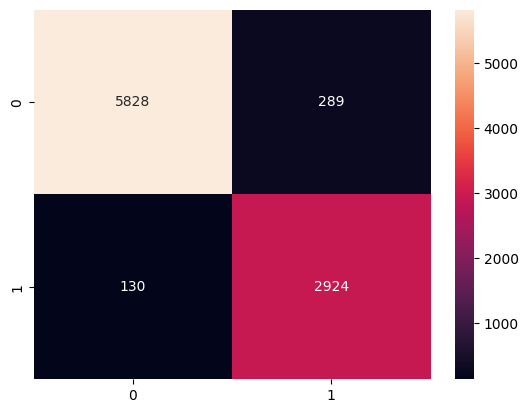

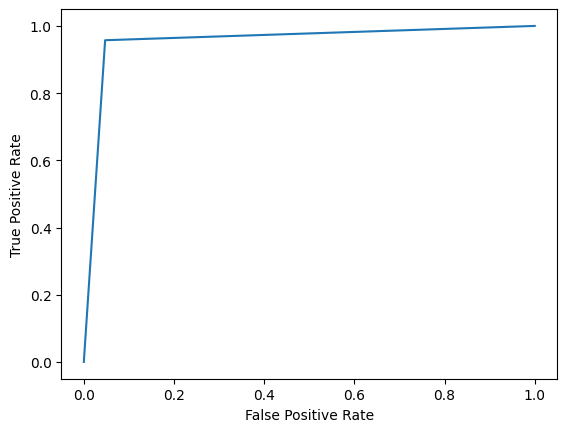

In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, random_state=0)

model.fit(Xtrn, ytrn)
#y_score = model.decision_function(Xtst)
rcf_predictions = model.predict(Xtst)
evaluate_model(ytst,rcf_predictions)
fpr, tpr, _ = roc_curve(ytst, rcf_predictions, pos_label=model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


Accuracy: 0.7499727401591975
Precision: 0.7069059271343121
Recall: 0.4256712508185986
F1 Score: 0.5313713468219907
AUC-ROC: 0.6687780808613183
Mean Absolute Error: 0.25002725984080254
Root Mean Squared Error: 0.5000272590977441


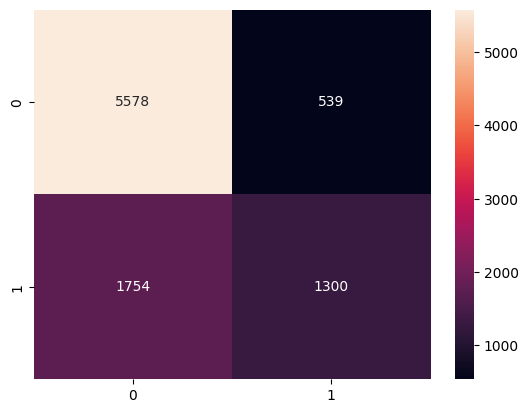

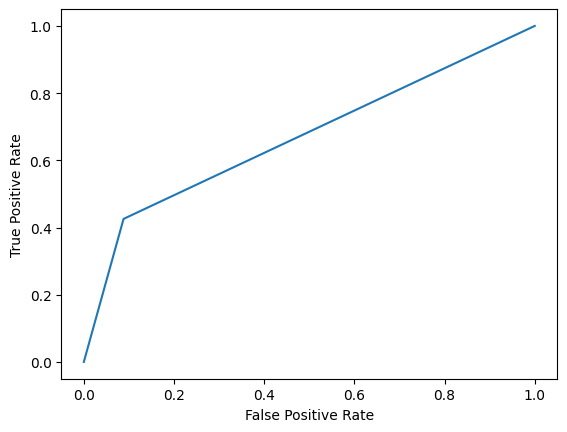

In [30]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrn, ytrn)
nbc_predictions = model.predict(Xtst)
evaluate_model(ytst,nbc_predictions)
fpr, tpr, _ = roc_curve(ytst, nbc_predictions, pos_label=model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Accuracy: 0.7469196379893142
Precision: 0.7396991497710922
Recall: 0.3703339882121807
F1 Score: 0.4935631682304168
AUC-ROC: 0.6526347070372658
Mean Absolute Error: 0.25308036201068584
Root Mean Squared Error: 0.5030709313910772


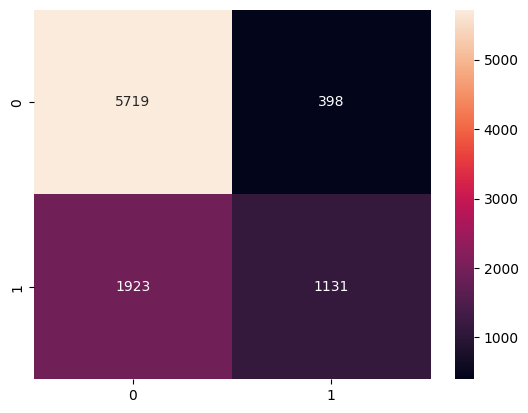

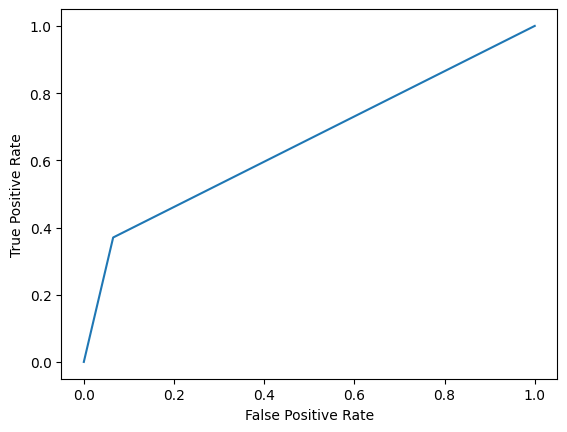

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty = 'l2',max_iter = 500)
model.fit(Xtrn, ytrn)
lr_predictions = model.predict(Xtst)
evaluate_model(ytst,lr_predictions)
fpr, tpr, _ = roc_curve(ytst, lr_predictions, pos_label=model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Accuracy: 0.8953222113182859
Precision: 0.8048922539312755
Recall: 0.9050425671250819
F1 Score: 0.8520345252774353
AUC-ROC: 0.8977558756828613
Mean Absolute Error: 0.1046777886817141
Root Mean Squared Error: 0.32353947005228606


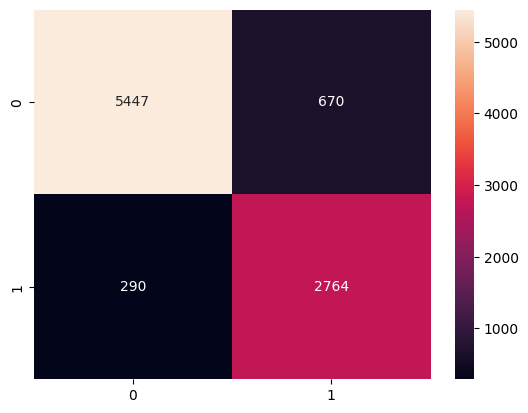

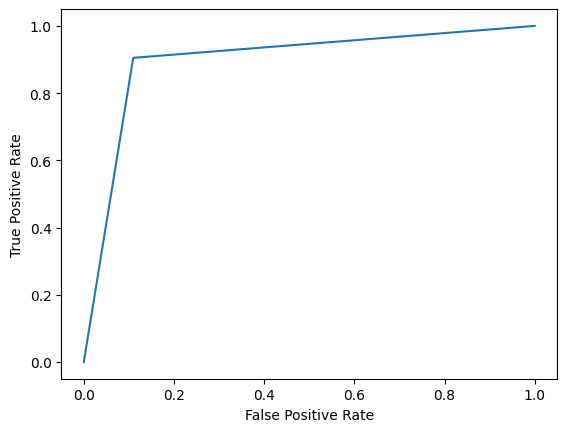

In [32]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(Xtrn, ytrn)
tree_predictions = dtree.predict(Xtst)
evaluate_model(ytst,tree_predictions)
fpr, tpr, _ = roc_curve(ytst, tree_predictions, pos_label=model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [ ]:
def partition(x):
    """
    Partition the column vector x into subsets indexed by its unique values (v1, ... vk)

    Returns a dictionary of the form
    { v1: indices of x == v1,
      v2: indices of x == v2,
      ...
      vk: indices of x == vk }, where [v1, ... vk] are all the unique values in the vector z.
    """

    # INSERT YOUR CODE HERE
    partition_dictionary = {}

    for key in np.unique(x):
        partition_dictionary.update({key : np.where(x==key)[0]})

    return partition_dictionary
    #raise Exception('Function not yet implemented!')
  

# function to calculate depth of the tree
def find_depth(tree, tree_depth=1):   
    for k in tree:
        if isinstance(tree[k], dict):
            tree_depth = find_depth(tree[k], tree_depth + 1)
    return tree_depth



def entropy(y):
    """
    Compute the entropy of a vector y by considering the counts of the unique values (v1, ... vk), in z

    Returns the entropy of z: H(z) = p(z=v1) log2(p(z=v1)) + ... + p(z=vk) log2(p(z=vk))
    """

    # INSERT YOUR CODE HERE
    uniqval_arr = partition(y)
    total_count = len(y)

    entropy_sum = 0

    for key in uniqval_arr.keys():
        tmp = (float)(len(uniqval_arr[key])/total_count)
        entropy_sum += -(tmp*np.log2(tmp))

    return entropy_sum
    #raise Exception('Function not yet implemented!')
    
    


def mutual_information(x, y):
    """
    Compute the mutual information between a data column (x) and the labels (y). The data column is a single attribute
    over all the examples (n x 1). Mutual information is the difference between the entropy BEFORE the split set, and
    the weighted-average entropy of EACH possible split.

    Returns the mutual information: I(x, y) = H(y) - H(y | x)
    """

    # INSERT YOUR CODE HERE
    entropy_y = entropy(y)
    totalcountforx = len(x)
    uniqval_arrforx = partition(x)

    entropy_ybyx = 0

    for k in uniqval_arrforx.keys():
        x_tmp = (float)(len(uniqval_arrforx[k]/totalcountforx))
        y_prime= [y[j] for j in uniqval_arrforx[k]]
        ybyx_prime = entropy(y_prime)
        entropy_ybyx += (x_tmp * ybyx_prime)

    final_entrpy = (entropy_y - entropy_ybyx)
    return final_entrpy
    #raise Exception('Function not yet implemented!')
    
    
def get_attribute_value_pairs(x,attribute_value_pairs):
    if (attribute_value_pairs is None):
        attribute_value_pairs = []
        for i in range (len(x[0])):
            for j in np.unique(np.array([arr[i] for arr in x])):
                attribute_value_pairs.append((i, j))
    attribute_value_pairs = np.array(attribute_value_pairs)
    return attribute_value_pairs


def get_gain(x,y,attribute_value_pairs):
    A = []
    for feat, val in attribute_value_pairs:
        feat = int(feat)
        A.append(mutual_information(np.asarray((x[:, feat] == val), dtype=int), y))
    A = np.array(A)

    return A   


def id3(x, y, attribute_value_pairs=None, depth=0, max_depth=5):
    

    y_val,y_count = np.unique(y,return_counts=True)
    attribute_value_pairs = get_attribute_value_pairs(x,attribute_value_pairs)
   
    if(len(y_val) == 1):
        return y_val[0]

    
    if(len(attribute_value_pairs) == 0 or depth == max_depth):
        a = np.argmax(y_count)
        return y_val[a]

   
    rec_tree = {}
    gain = []
  
    gain = get_gain(x,y,attribute_value_pairs)
  
    (feat, val) = attribute_value_pairs[np.argmax(gain)]
    feat = int(feat)
    split = partition(np.array(np.asarray((x[:, feat] == val), dtype=int)))
   
    attribute_value_pairs = np.delete(attribute_value_pairs, np.argmax(gain), 0)

    for value, idx in split.items():
        x_subset = x.take(np.array(idx), axis=0)
        y_subset = y.take(np.array(idx), axis=0)
      
        rec_tree[(feat, val, bool(value))] = id3(x_subset, y_subset, attribute_value_pairs=attribute_value_pairs, depth=depth+1, max_depth=max_depth)

    return rec_tree

    
    


    
def predict_example(x, tree):
    
    
    for node,subtree in tree.items():
        
        attribute_index = node[0]
        attribute_value = node[1]
        attribute_decision = node[2]

        if attribute_decision == (x[attribute_index] == attribute_value):
            if type(subtree) is dict:
                return predict_example(x,subtree)
            else:
                return subtree
                
               

def compute_error(y_true, y_pred):
   
    n = len(y_true)
    error = (1/n) * sum(y_true != y_pred)
    return error
    
    

def visualize(tree, depth=0):
    

    if depth == 0:
        print('TREE')

    for index, split_criterion in enumerate(tree):
        sub_trees = tree[split_criterion]

        # Print the current node: split criterion
        print('|\t' * depth, end='')
        print('+-- [SPLIT: x{0} = {1}]'.format(split_criterion[0], split_criterion[1]))

        # Print the children
        if type(sub_trees) is dict:
            visualize(sub_trees, depth + 1)
        else:
            print('|\t' * (depth + 1), end='')
            print('+-- [LABEL = {0}]'.format(sub_trees))

In [ ]:
#trn_err = []
#tst_err = []
#depth = []

#for p in range(1,5):
decision_tree = id3(Xtrn, ytrn, max_depth=5)
#depth.append(p)
# Compute the training & test error
y_tr_pred = [predict_example(x, decision_tree) for x in Xtrn]
trn_err = compute_error(ytrn, y_tr_pred)*100
#trn_err.append((compute_error(ytrn, y_tr_pred)*100))
y_pred = [predict_example(x, decision_tree) for x in Xtst]
tst_err = (compute_error(ytst, y_pred)*100)
#tst_err.append((compute_error(ytst, y_pred)*100))
print(trn_err)
print(tst_err)            
#print the train & test error for differnt depths
#print('Depth:',p)
#print('   Train Error = {0:4.2f}%.'.format(trn_err[-1]))
#print('   Test Error = {0:4.2f}%.'.format(tst_err[-1]))

32.984378833728634
33.22429397012321


In [ ]:
visualize(decision_tree,5)

|	|	|	|	|	+-- [SPLIT: x15 = 0.0]
|	|	|	|	|	|	+-- [SPLIT: x3 = 2.0223502588829914]
|	|	|	|	|	|	|	+-- [SPLIT: x0 = 0.0]
|	|	|	|	|	|	|	|	+-- [SPLIT: x0 = 1.0]
|	|	|	|	|	|	|	|	|	+-- [SPLIT: x8 = -0.4107956921570727]
|	|	|	|	|	|	|	|	|	|	+-- [LABEL = 0]
|	|	|	|	|	|	|	|	|	+-- [SPLIT: x8 = -0.4107956921570727]
|	|	|	|	|	|	|	|	|	|	+-- [LABEL = 0]
|	|	|	|	|	|	|	|	+-- [SPLIT: x0 = 1.0]
|	|	|	|	|	|	|	|	|	+-- [SPLIT: x6 = 1.6215832745936]
|	|	|	|	|	|	|	|	|	|	+-- [LABEL = 0]
|	|	|	|	|	|	|	|	|	+-- [SPLIT: x6 = 1.6215832745936]
|	|	|	|	|	|	|	|	|	|	+-- [LABEL = 1]
|	|	|	|	|	|	|	+-- [SPLIT: x0 = 0.0]
|	|	|	|	|	|	|	|	+-- [SPLIT: x6 = 1.834243053048459]
|	|	|	|	|	|	|	|	|	+-- [SPLIT: x8 = 1.3290238726549564]
|	|	|	|	|	|	|	|	|	|	+-- [LABEL = 0]
|	|	|	|	|	|	|	|	|	+-- [SPLIT: x8 = 1.3290238726549564]
|	|	|	|	|	|	|	|	|	|	+-- [LABEL = 1]
|	|	|	|	|	|	|	|	+-- [SPLIT: x6 = 1.834243053048459]
|	|	|	|	|	|	|	|	|	+-- [LABEL = 1]
|	|	|	|	|	|	+-- [SPLIT: x3 = 2.0223502588829914]
|	|	|	|	|	|	|	+-- [SPLIT: x16 = 17.0]
|	|

Accuracy: 0.6677570602987678
Precision: 0.5925925925925926
Recall: 0.01046777886817141
F1 Score: 0.020572163291546125
AUC-ROC: 0.5034347399411188
Mean Absolute Error: 0.33224293970123214
Root Mean Squared Error: 0.5764051870873753


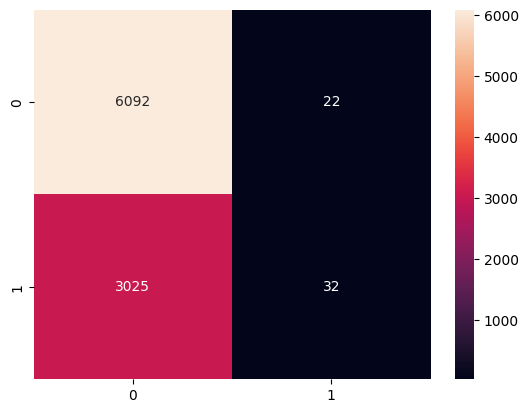

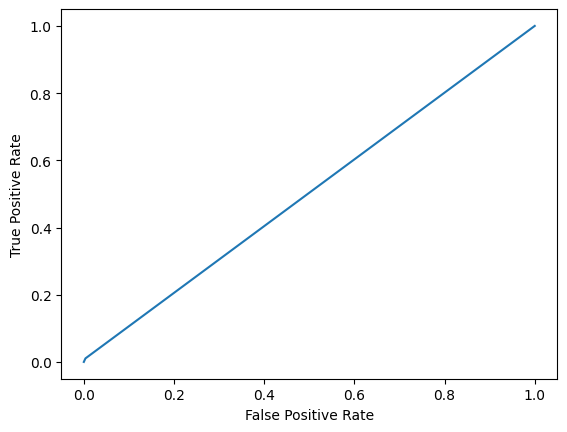

In [ ]:
#tree_predict = dtree.predict(Xtst)
evaluate_model(ytst,y_pred)
fpr, tpr, _ = roc_curve(ytst, y_pred, pos_label=model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

31.763038085112182
32.482826300294406
|	|	|	|	|	|	|	|	|	|	+-- [SPLIT: x15 = 0.0]
|	|	|	|	|	|	|	|	|	|	|	+-- [SPLIT: x3 = 2.0223502588829914]
|	|	|	|	|	|	|	|	|	|	|	|	+-- [SPLIT: x0 = 0.0]
|	|	|	|	|	|	|	|	|	|	|	|	|	+-- [SPLIT: x0 = 1.0]
|	|	|	|	|	|	|	|	|	|	|	|	|	|	+-- [SPLIT: x8 = -0.4107956921570727]
|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	+-- [SPLIT: x3 = 1.3510684180265315]
|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	+-- [SPLIT: x7 = -0.04388043786504828]
|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	+-- [SPLIT: x3 = 1.9552220747973492]
|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	+-- [SPLIT: x5 = 2.0836490477072784]
|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	+-- [SPLIT: x16 = 80.0]
|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	+-- [LABEL = 0]
|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	+-- [SPLIT: x16 = 80.0]
|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	+-- [LABEL = 1]
|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	+-- [SPLIT: x5 = 2.0836490477072784]
|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	+-- [SPLIT: x11 = -0.41687948348670795]
|	|	|	|	|	|	|	|	|	|	|	|	|	|	|	|

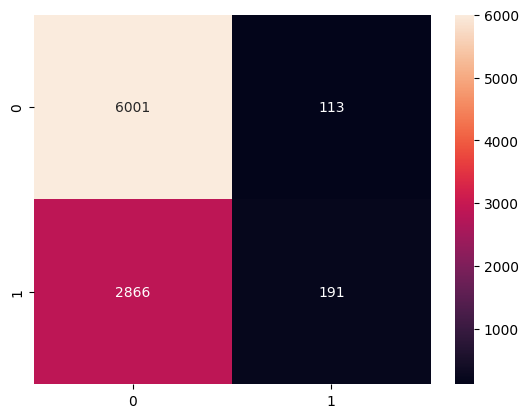

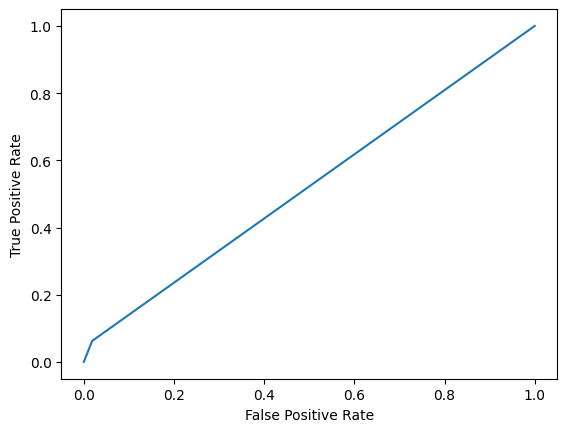

In [ ]:
decision_tree = id3(Xtrn, ytrn, max_depth=10)
y_tr_pred = [predict_example(x, decision_tree) for x in Xtrn]
trn_err = compute_error(ytrn, y_tr_pred)*100

y_pred = [predict_example(x, decision_tree) for x in Xtst]
tst_err = (compute_error(ytst, y_pred)*100)

print(trn_err)
print(tst_err)  
#tree_pred = decision_tree.predict(Xtst)
visualize(decision_tree,10)
evaluate_model(ytst,y_pred)
fpr, tpr, _ = roc_curve(ytst,y_pred, pos_label=model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [39]:
class LogisticRegression:
    def __init__(self, lr=0.1, num_iters=2000):
        self.lr = lr
        self.num_iters = num_iters
        self.weights = None
        self.bias = None
    
    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def binary_cross_entropy_loss(self, y, y_hat):
        loss = -(y * np.log(y_hat + 1e-7) + (1 - y) * np.log(1 - y_hat + 1e-7))
        return loss
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        for i in range(self.num_iters):
            # forward propagation
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            loss = self.binary_cross_entropy_loss(y, y_pred)
            
            # backward propagation
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)
            
            # update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
        return y_pred_class

Accuracy: 0.505506487842111
Precision: 0.38913010929779906
Recall: 0.8510150622134905
F1 Score: 0.5340593855953971
AUC-ROC: 0.5920107189439203
Mean Absolute Error: 0.494493512157889
Root Mean Squared Error: 0.7032023266158105


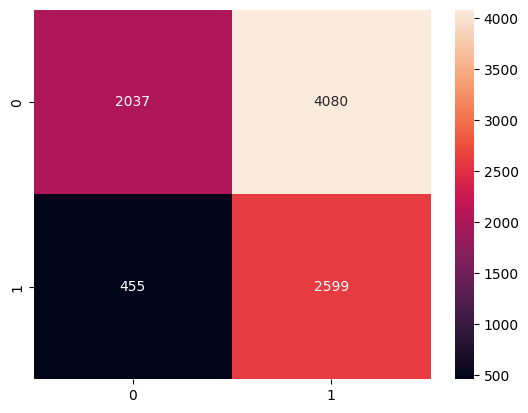

In [40]:
lr = LogisticRegression()
lr.fit(Xtrn, ytrn)

y_pred = lr.predict(Xtst)
evaluate_model(ytst,y_pred)

In [45]:
class LogisticRegressionReg:
    def __init__(self, learning_rate=0.1, num_iterations=3000, lambda_reg=0.01):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.lambda_reg = lambda_reg
        
    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def cost_function(self, X, y, w):
        m = X.shape[0]
        z = np.dot(X, w)
        h = self.sigmoid(z)
        J = (-1/m) * np.sum(y * np.log(h + 1e-7) + (1 - y) * np.log(1 - h + 1e-7))
        reg = (self.lambda_reg / (2 * m)) * np.sum(w**2)
        J += reg
        return J
    
    def fit(self, X, y):
        m, n = X.shape
        X = np.concatenate([np.ones((m, 1)), X], axis=1)
        y = y.reshape(-1, 1)
        w = np.zeros((n+1, 1))
        
        for i in range(self.num_iterations):
            z = np.dot(X, w)
            h = self.sigmoid(z)
            grad = (1/m) * np.dot(X.T, (h - y))
            reg = (self.lambda_reg / m) * w
            reg[0] = 0  # Exclude regularization for bias term
            grad += reg
            w -= self.learning_rate * grad
            
            if i % 100 == 0:
                J = self.cost_function(X, y, w)
                print("Cost after iteration {}: {}".format(i, J))
                
        self.w = w
        
    def predict(self, X):
        m = X.shape[0]
        X = np.concatenate([np.ones((m, 1)), X], axis=1)
        z = np.dot(X, self.w)
        y_pred = self.sigmoid(z)
        y_pred_class = np.where(y_pred >= 0.5, 1, 0)
        return y_pred_class

Cost after iteration 0: 5.147320507613444
Cost after iteration 100: 5.831695623796819
Cost after iteration 200: 4.395300622803242
Cost after iteration 300: 7.378402976882217
Cost after iteration 400: 6.2753611955756865
Cost after iteration 500: 6.6209092447595905
Cost after iteration 600: 5.361663727741624
Cost after iteration 700: 5.355710773192808
Cost after iteration 800: 5.312106975047243
Cost after iteration 900: 3.9598270318933455
Cost after iteration 1000: 4.687108797764475
Cost after iteration 1100: 5.37403768228525
Cost after iteration 1200: 5.411949728769203
Cost after iteration 1300: 5.374041786361084
Cost after iteration 1400: 7.662966140445682
Cost after iteration 1500: 4.448865456434748
Cost after iteration 1600: 5.094520476882436
Cost after iteration 1700: 5.01071861452616
Cost after iteration 1800: 7.575441343270895
Cost after iteration 1900: 6.947733196858749
Cost after iteration 2000: 7.228083604851802
Cost after iteration 2100: 9.66924438365595
Cost after iteration 2

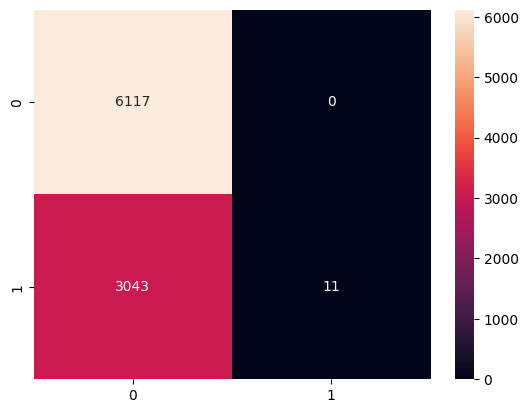

In [46]:
lrreg = LogisticRegressionReg()
lrreg.fit(Xtrn, ytrn)

y_pred = lrreg.predict(Xtst)
evaluate_model(ytst,y_pred)

[02:34:05] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Accuracy: 0.8557409224730128
Precision: 0.8204368752313957
Recall: 0.7256057629338573
F1 Score: 0.770112945264987
AUC-ROC: 0.8231592653152202
Mean Absolute Error: 0.14425907752698724
Root Mean Squared Error: 0.37981453043161373


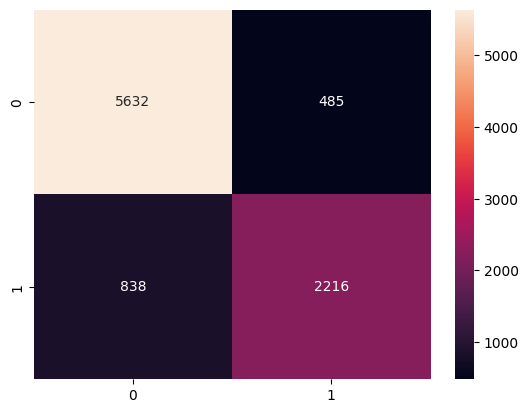

In [47]:
import xgboost as xgb
dtrain = xgb.DMatrix(Xtrn, label=ytrn)
dtest = xgb.DMatrix(Xtst, label=ytst)
param = {
    'max_depth': 5,  
    'eta': 0.3,  
    'silent': 1,  
    'objective': 'binary:logistic'}  
num_round = 100
bst = xgb.train(param, dtrain, num_round)
xgb_predictions = bst.predict(dtest)
prediction = []
for i in xgb_predictions:
  if i<0.5:
    prediction.append(0)
  else:
    prediction.append(1)
evaluate_model(y_test,prediction)

Accuracy: 0.7787591320466688
Precision: 0.7052462955546656
Recall: 0.5766208251473477
F1 Score: 0.634480273824536
AUC-ROC: 0.7281502033207721
Mean Absolute Error: 0.22124086795333114
Root Mean Squared Error: 0.4703624856994137


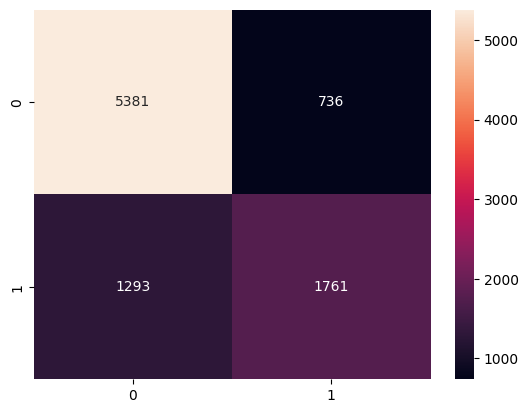

In [50]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter=1000,activation = 'relu',solver='adam',random_state=1)
nn.fit(Xtrn, ytrn)
y_pred = nn.predict(Xtst)
evaluate_model(ytst,y_pred)